Import libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
from nltk.util import ngrams
import re

 Load the dataset

In [31]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')

In [32]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Firew
[nltk_data]     Ayele\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Firew
[nltk_data]     Ayele\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
nltk.download('averaged_perceptron_tagger')  
nltk.download('maxent_ne_chunker')   
nltk.download('words') 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Firew Ayele\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Firew
[nltk_data]     Ayele\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Firew
[nltk_data]     Ayele\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

Sentiment Analysis

Defining a function to perform sentiment analysis on headlines

In [34]:
def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

Apply the sentiment analysis function to the 'headline' column

In [ ]:
df['sentiment'] = df['headline'].apply(get_sentiment)

visualize the results

sentiment
Neutral     934914
Positive    341178
Negative    131236
Name: count, dtype: int64


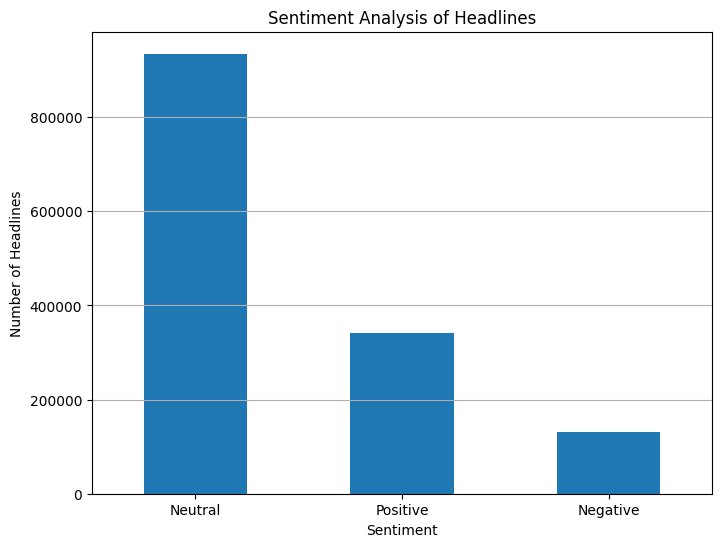

In [ ]:
sentiment_counts = df['sentiment'].value_counts()

# Print the sentiment counts
print(sentiment_counts)

# Optionally, plot a bar chart of sentiment counts
sentiment_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Sentiment Analysis of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Using natural language processing to identify common keywords or phrases

Text cleaning